## 3. Normalizing Data

In [5]:
import DBConn as dbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pprint import pprint

/home/gwak/anaconda3/envs/cpl/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
cut_off_data = pd.read_csv("./data/cut_off_data.csv", index_col="Unnamed: 0")
cut_off_data.describe()

,28:c2:dd:70:6f:51,28:c2:dd:70:70:4b,28:c2:dd:70:70:4f,28:c2:dd:70:70:51,28:c2:dd:70:93:0d,68:ca:e4:47:51:80,68:ca:e4:47:51:81,68:ca:e4:47:51:8e,68:ca:e4:47:51:8f,magnetic_x,magnetic_y,magnetic_z,x,y
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,-71.622222,-67.552381,-68.406349,-69.765079,-71.768254,-61.307937,-61.076190,-60.263492,-60.260317,13.387937,-7.886032,-24.215238,6.326984,2.561905
std,10.841658,11.478571,9.765725,8.579456,10.608866,10.578962,10.582429,13.887300,13.883576,19.132335,20.894651,18.166040,4.332267,4.204010
min,-88.000000,-86.000000,-85.000000,-81.000000,-100.000000,-83.000000,-83.000000,-100.000000,-100.000000,-27.800001,-48.100002,-63.900002,0.000000,-8.000000
25%,-81.000000,-76.000000,-77.000000,-80.000000,-77.000000,-69.000000,-69.000000,-69.000000,-69.000000,-2.050000,-23.200001,-35.450001,2.000000,0.000000
50%,-73.000000,-64.000000,-67.000000,-70.000000,-68.000000,-59.000000,-59.000000,-55.000000,-55.000000,17.100000,-7.200000,-29.000000,7.000000,3.000000
75%,-63.000000,-61.000000,-61.000000,-63.000000,-64.000000,-52.000000,-51.000000,-49.000000,-49.000000,24.800000,8.950000,-16.450001,10.000000,7.000000
max,-52.000000,-47.000000,-51.000000,-53.000000,-56.000000,-46.000000,-44.000000,-45.000000,-45.000000,49.700001,35.200001,39.200001,12.000000,8.000000


In [4]:
cut_off_data.isnull().sum()

28:c2:dd:70:6f:51    0
28:c2:dd:70:70:4b    0
28:c2:dd:70:70:4f    0
28:c2:dd:70:70:51    0
28:c2:dd:70:93:0d    0
68:ca:e4:47:51:80    0
68:ca:e4:47:51:81    0
68:ca:e4:47:51:8e    0
68:ca:e4:47:51:8f    0
magnetic_x           0
magnetic_y           0
magnetic_z           0
x                    0
y                    0
dtype: int64

AttributeError: module 'seaborn' has no attribute 'plt'

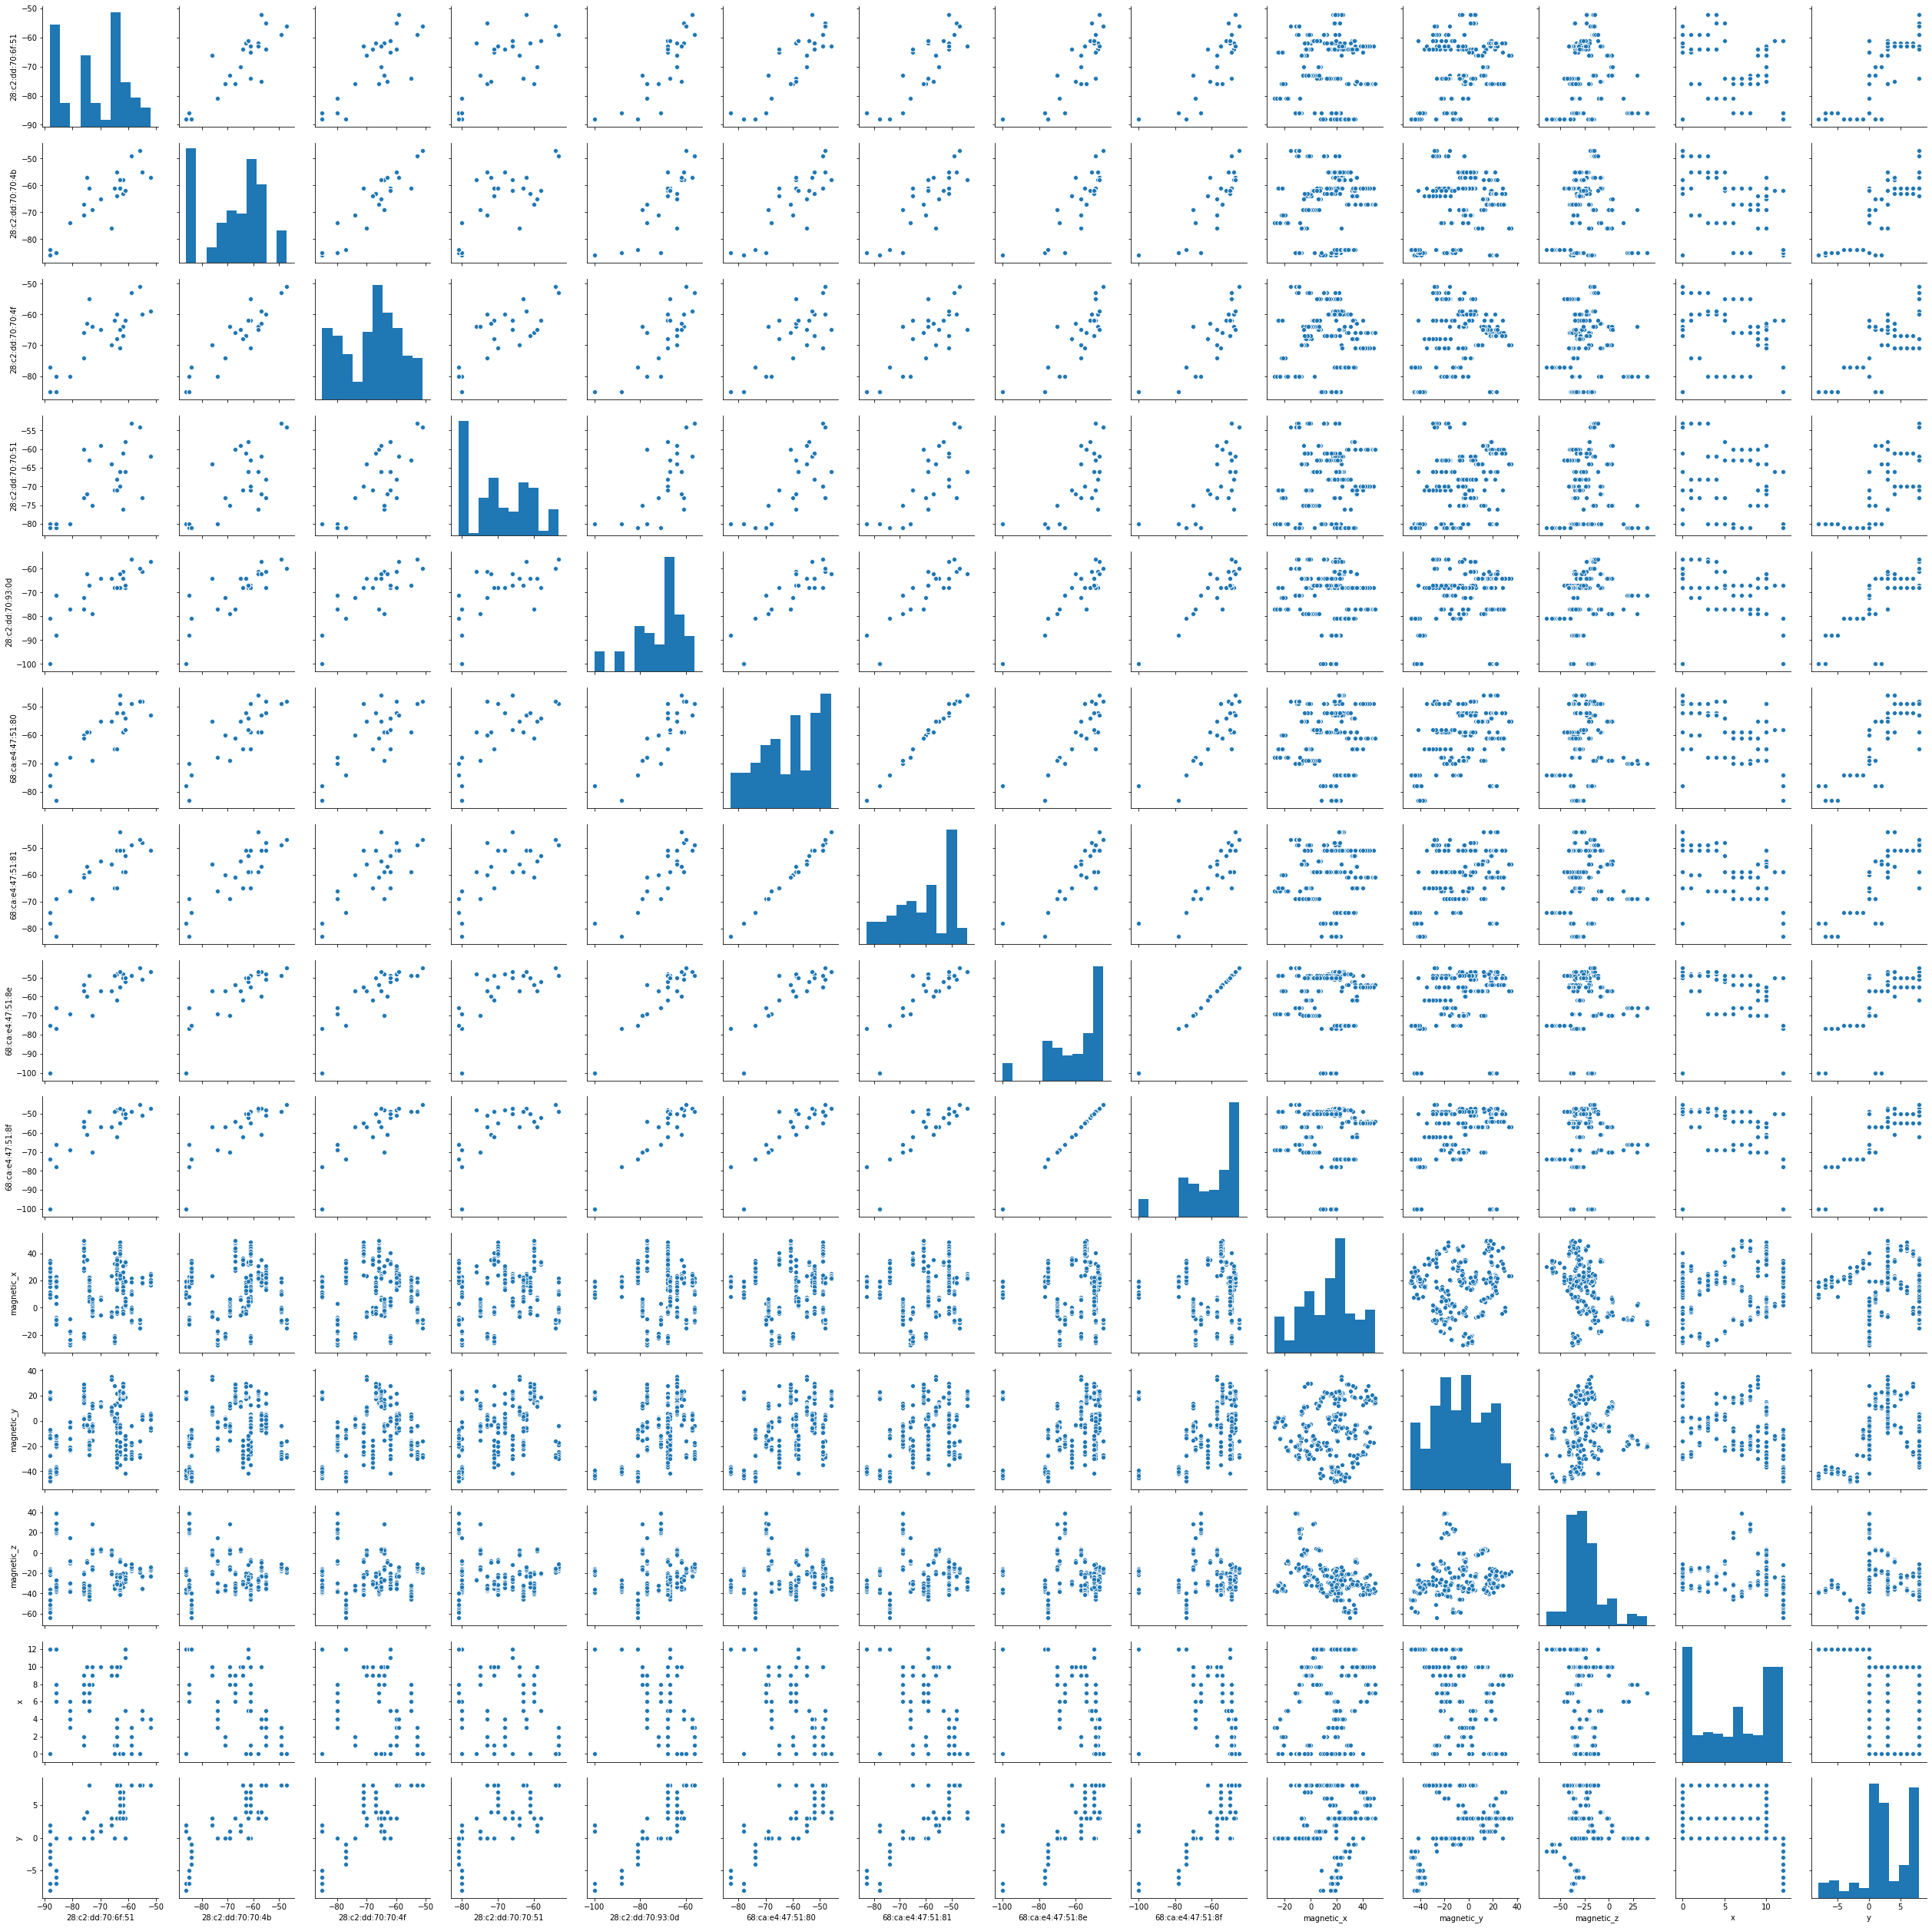

In [6]:
sns.pairplot(cut_off_data)
sns.sh

In [8]:
_X = cut_off_data.drop(['x', 'y'], axis=1)
_Y = cut_off_data[['x', 'y']]

In [9]:
_X.dtypes

28:c2:dd:70:6f:51    float64
28:c2:dd:70:70:4b    float64
28:c2:dd:70:70:4f    float64
28:c2:dd:70:70:51    float64
28:c2:dd:70:93:0d    float64
68:ca:e4:47:51:80    float64
68:ca:e4:47:51:81    float64
68:ca:e4:47:51:8e    float64
68:ca:e4:47:51:8f    float64
magnetic_x           float64
magnetic_y           float64
magnetic_z           float64
dtype: object

In [10]:
_Y.dtypes

x    float64
y    float64
dtype: object

In [11]:
scaler = StandardScaler()

In [12]:
_scaled_X = scaler.fit_transform(_X.values)

In [13]:
scaled_X_df = pd.DataFrame(_scaled_X, columns=_X.columns)
scaled_X_df.dtypes

28:c2:dd:70:6f:51    float64
28:c2:dd:70:70:4b    float64
28:c2:dd:70:70:4f    float64
28:c2:dd:70:70:51    float64
28:c2:dd:70:93:0d    float64
68:ca:e4:47:51:80    float64
68:ca:e4:47:51:81    float64
68:ca:e4:47:51:8e    float64
68:ca:e4:47:51:8f    float64
magnetic_x           float64
magnetic_y           float64
magnetic_z           float64
dtype: object

In [14]:
scaled_X_df.describe()

,28:c2:dd:70:6f:51,28:c2:dd:70:70:4b,28:c2:dd:70:70:4f,28:c2:dd:70:70:51,28:c2:dd:70:93:0d,68:ca:e4:47:51:80,68:ca:e4:47:51:81,68:ca:e4:47:51:8e,68:ca:e4:47:51:8f,magnetic_x,magnetic_y,magnetic_z
count,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02,3.150000e+02
mean,-2.030122e-16,4.511382e-16,-1.353415e-16,-7.894919e-16,3.609106e-16,2.142907e-16,-2.255691e-17,2.255691e-16,-2.255691e-17,2.255691e-17,4.511382e-17,-3.383537e-17
std,1.001591e+00,1.001591e+00,1.001591e+00,1.001591e+00,1.001591e+00,1.001591e+00,1.001591e+00,1.001591e+00,1.001591e+00,1.001591e+00,1.001591e+00,1.001591e+00
min,-1.513038e+00,-1.609693e+00,-1.701876e+00,-1.311598e+00,-2.665381e+00,-2.053753e+00,-2.075014e+00,-2.865909e+00,-2.866906e+00,-2.156217e+00,-1.927668e+00,-2.188034e+00
25%,-8.663526e-01,-7.371179e-01,-8.813810e-01,-1.194855e+00,-4.939331e-01,-7.282664e-01,-7.499617e-01,-6.301015e-01,-6.304995e-01,-8.081868e-01,-7.340795e-01,-6.194326e-01
50%,-1.272840e-01,3.099718e-01,1.442378e-01,-2.742533e-02,3.557637e-01,2.185100e-01,1.965044e-01,3.796178e-01,3.794906e-01,1.943291e-01,3.288512e-02,-2.638095e-01
75%,7.965517e-01,5.717442e-01,7.596091e-01,7.897754e-01,7.334068e-01,8.812534e-01,9.536773e-01,8.123547e-01,8.123436e-01,5.974295e-01,8.070400e-01,4.281392e-01
max,1.812771e+00,1.793349e+00,1.785228e+00,1.957205e+00,1.488693e+00,1.449319e+00,1.616204e+00,1.100846e+00,1.100912e+00,1.900962e+00,2.065341e+00,3.496422e+00


In [15]:
scaled_X_df.to_csv("./data/scaled_X.csv")
_Y.to_csv("./data/Y.csv")